## Support vector machine

Support Vector Machine is a methode to automatically classify data. In this respects it is similar to the k-means clustering algorithm. A typical case where this is useful comes from geophysics where the task is to classify geological formations inro different rocktypes based on measurements at the surface. The figure below shows a crossplot of two different measurements which can be obtained from well logs or seismic reflection surveys.

![Crossplot of the ratio of P-wave velocity to S-wave velocity versus acoustic impedance](svm-vp-vs-ai.jpg)

The red points to the lower left represents data points which can be associated with sandstones filled with hydrocarbons, while the blue upper right points represents shale. Using a bit of imagination it would be possible to draw a straight line separating the red points below the line and the blue points above the line. A more refined approach would be to draw two striaght lines, one close to the red points and another close to the blue points, as illustrated in the simpler sketch below.

![Principle of support vector machine method](svm-basic.jpg)

Here we have defined three straight lines.
The red line in the middle is described by the equation for a straight line

\begin{eqnarray}
\mathbf{w}\cdot\mathbf{x} -\mathbf{b} = 0 
\end{eqnarray}
where the vector $\mathbf{w}$ is a normal vector to the lines and the
vector $\mathbf{x} = (x_1,x_2)$.
The $\mathbf{b}$ vector divided by the length of $\mathbf{w}$

\begin{eqnarray}
  \frac{\mathbf{b}}{||\mathbf{w}||}
\end{eqnarray}

is the distance
from to origin to the line along the normal vector.

The two other lines can be described by the equations
\begin{eqnarray}
\mathbf{w}\cdot\mathbf{x} -\mathbf{b} = -1, \\
\mathbf{w}\cdot\mathbf{x} -\mathbf{b} =  +1.
\end{eqnarray}

The two last lines are called support vectors. 
The main idea of the support vector machine is to classify the points in the $(x_1,x_2)$ plane by checking if a general point $\mathbf{x}$ is positioned above the upper line or below the lower line. Mathematically we can perform classification by
saying that a pont $\mathbf{x}^i$, where $i=0,\cdots,N-1$ labels one if $N$ points,has property $y^i=1$ if the point satisfy

\begin{eqnarray}
\mathbf{w}\cdot\mathbf{x}^i -\mathbf{b} =  \ge 1.
\end{eqnarray}

and has property $y^i=-1$ if it satifies

\begin{eqnarray}
\mathbf{w}\cdot\mathbf{x}^i -\mathbf{b} =  \le -1.
\end{eqnarray}

These two conditions can be combined into a single condition
\begin{eqnarray}
y^i\left(\mathbf{w}\cdot\mathbf{x}^i -\mathbf{b}\right) =  \ge 1.
\end{eqnarray}

The extra idea added is that we want to make sure the separation between the to lines
is as large as possible. The distance between the two lines is given by 
$2/||\mathbf{w}||.$ To maximize the distance we must minimize $||\mathbf{w}||$.

This can be formulated as an optimization problem 

\begin{eqnarray}
  minimize\, 
  \frac{1}{2} ||\mathbf{w}||_{\mathbf{w},\mathbf{b}}\\
  with\,constraint\,
  y^i\left(\mathbf{w}\cdot\mathbf{x}^1 
  -\mathbf{b}\right) \ge 1.
\end{eqnarray}

In practice it turns out that it is better to formulate the constrain as

\begin{eqnarray}
  max(0,1- y^i\left(\mathbf{w}\cdot\mathbf{x}^i -\mathbf{b}\right)) 
\end{eqnarray}
This function is zero when the constraint is satified or proportional
to the distance from the either of the two lines. This makes for a "softer" constraint.

The constraint is included in the optimization problem as an object function

\begin{eqnarray}
\frac{1}{2}||\mathbf{w}|| 
+ C \sum_{i=0}^{N-1}\frac{1}{N}\left[max(0,1- y^i\left(\mathbf{w}\cdot\mathbf{x}^i -\mathbf{b}\right))\right]
\end{eqnarray}
Where the constant $C$ determines the tradeoff between the minimization of
$\mathbf{w}$ and the constraint.


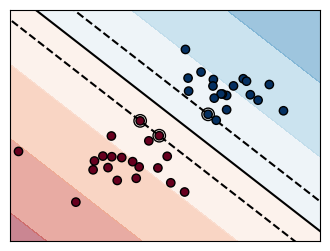

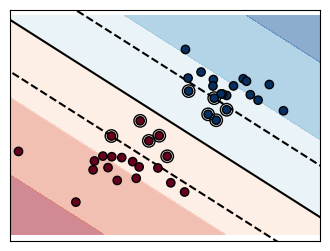

In [1]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm

# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# figure number
fignum = 1

# fit the model
for name, penalty in (("unreg", 1), ("reg", 0.05)):
    clf = svm.SVC(kernel="linear", C=penalty)
    clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_**2))
    yy_down = yy - np.sqrt(1 + a**2) * margin
    yy_up = yy + np.sqrt(1 + a**2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, "k-")
    plt.plot(xx, yy_down, "k--")
    plt.plot(xx, yy_up, "k--")

    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k",
    )
    plt.scatter(
        X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.get_cmap("RdBu"), edgecolors="k"
    )

    plt.axis("tight")
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Put the result into a contour plot
    plt.contourf(XX, YY, Z, cmap=plt.get_cmap("RdBu"), alpha=0.5, linestyles=["-"])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()